In [2]:
%matplotlib inline

In [3]:
from matplotlib import pyplot as plt
import numpy as np

In [4]:
# Each point is length, width, type (0, 1)
data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5, 1,   1],
        [1,   1,   0]]

mystery_flower =[4.5, 1]

In [5]:
# Network

#    o    Flower type
#   / \   w1, w2, b
#  o   o  length, width



In [6]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

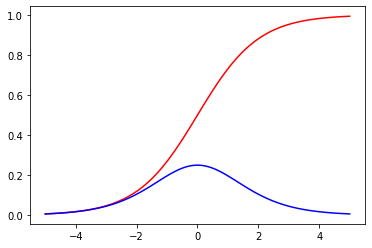

In [7]:
T = np.linspace(-5, 5, 100)
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_p(T), c='b')

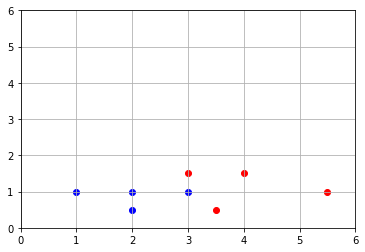

In [10]:
# scatter data
plt.axis([0, 6, 0, 6])
plt.grid()
for i in range(len(data)):
    point = data[i]
    color ="r"
    if point[2] ==0:
        color = "b"
    plt.scatter(point[0], point[1], c=color)

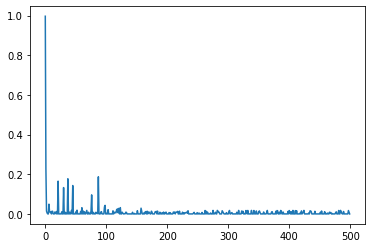

In [11]:
# Training loop

learning_rate = 0.75
costs = []

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

for i in range(50000):
    ri = np.random.randint(len(data))
    point = data[ri]
    
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    
    target = point[2]
    cost = np.square(pred - target)
        
    dcost_pred = 2 * (pred - target)
    dpred_dz = sigmoid_p(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
    
    dcost_dz = dcost_pred * dpred_dz
    
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db
    
    if i % 100 == 0:
        cost_sum = 0
        for j in range(len(data)):
            point = data[ri]
            
            z = point[0] * w1 + point[1] * w2 + b
            pred = sigmoid(z)
            
            target = point[2]
            cost_sum += np.square(pred - target)
            
        costs.append(cost_sum/len(data))
    
plt.plot(costs)

In [12]:
w1

14.052064257191441

In [13]:
w2

6.8370193861969755

In [14]:
b

-50.87799740697242

In [15]:
for i in range(len(data)):
    point = data[i]
    print(point)
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    print("Pred: {}".format(pred))

[3, 1.5, 1]
Pred: 0.822550591424187
[2, 1, 0]
Pred: 1.1987100552937645e-07
[4, 1.5, 1]
Pred: 0.9999998297144105
[3, 1, 0]
Pred: 0.13184019619389792
[3.5, 0.5, 1]
Pred: 0.84848106736042
[2, 0.5, 0]
Pred: 3.927121180970104e-09
[5.5, 1, 1]
Pred: 0.9999999999999964
[1, 1, 0]
Pred: 9.461940967935529e-14


In [16]:
z = mystery_flower[0] * w1 + mystery_flower[1] * w2 + b
pred = sigmoid(z)
pred

0.9999999953820324

In [17]:
import os

In [18]:
def which_flower(length, width):
    z = length * w1 + width * w2 + b
    pred = sigmoid(z)
    if pred < .5:
        os.system("say blue")
    else:
        os.system("say red")

In [19]:
which_flower(2, 1)